In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Emotion_final.csv")
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df[df.duplicated()]

,Text,Emotion
13846,i feel more adventurous willing to take risks ...,happy
21165,There was a hint of exasperation in his vo,anger
21250,His comments are a major diplomatic gaffe as t...,fear


In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]

In [ ]:
duplicate_counts = duplicated_rows.groupby(['Text', 'Emotion']).size().reset_index(name='count')
duplicate_counts

,Text,Emotion,count
0,His comments are a major diplomatic gaffe as t...,fear,2
1,There was a hint of exasperation in his vo,anger,2
2,i feel more adventurous willing to take risks ...,happy,2


In [ ]:
duplicate_counts['count'].unique()

array([2])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21456 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21456 non-null  object
 1   Emotion  21456 non-null  object
dtypes: object(2)
memory usage: 502.9+ KB


In [ ]:
df.shape

(21456, 2)

<Figure size 3000x3000 with 0 Axes>

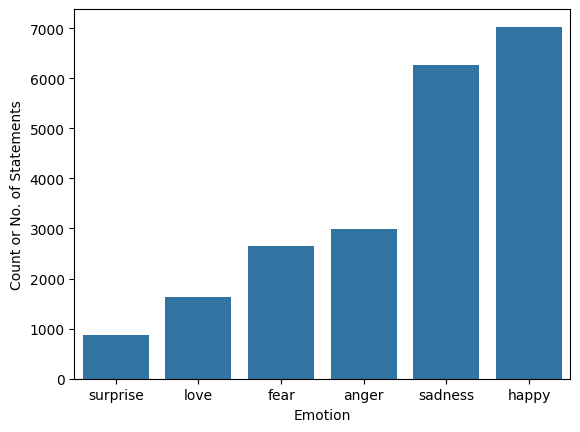

<Figure size 3000x3000 with 0 Axes>

In [ ]:
data = df.groupby('Emotion')['Text'].count().sort_values().reset_index()

sns.barplot(data=data, x='Emotion', y='Text')

plt.xlabel('Emotion')
plt.ylabel('Count or No. of Statements')

plt.figure(figsize = (30,30))

In [ ]:
df['statement_length'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = np.round(df['statement_length'] / df['num_words'])
df['avg_word_length'] = df['avg_word_length'].map(int)
df['vocabulary_size'] = df['Text'].apply(lambda x: len(set(x.split())))

df.head()

,Text,Emotion,statement_length,num_words,avg_word_length,vocabulary_size
0,i didnt feel humiliated,sadness,23,4,6,4
1,i can go from feeling so hopeless to so damned...,sadness,108,21,5,19
2,im grabbing a minute to post i feel greedy wrong,anger,48,10,5,10
3,i am ever feeling nostalgic about the fireplac...,love,92,18,5,16
4,i am feeling grouchy,anger,20,4,5,4


In [ ]:
df['statement_length'].describe()

,statement_length
count,21456.000000
mean,96.714346
std,55.386278
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,307.000000


In [ ]:
min_length = df['statement_length'].min()
min_length_statements = df[df['statement_length'] == min_length]

min_length_statements

,Text,Emotion,statement_length,num_words,avg_word_length,vocabulary_size
12801,one day,sadness,7,2,4,2


In [ ]:
max_length = df['statement_length'].max()
max_length_statements = df[df['statement_length'] == max_length]

max_length_statements

,Text,Emotion,statement_length,num_words,avg_word_length,vocabulary_size
21335,"Rather than match China 's firmness , it can b...",fear,307,55,6,47


In [ ]:
df['statement_length'].max()

307

In [ ]:
df['num_words'].max()

66

In [ ]:
df['num_words'].min()

2

In [ ]:
df['vocabulary_size'].min()

2

In [ ]:
df['vocabulary_size'].max()

51

In [ ]:
df[df['vocabulary_size'] == df['vocabulary_size'].max()]

,Text,Emotion,statement_length,num_words,avg_word_length,vocabulary_size
3323,i was able to guess or pick up on a lot of the...,happy,294,59,5,51


In [ ]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
happy,7028
sadness,6265
anger,2992
fear,2651
love,1641
surprise,879


Text(0.5, 1.0, 'Distribution of emotion')

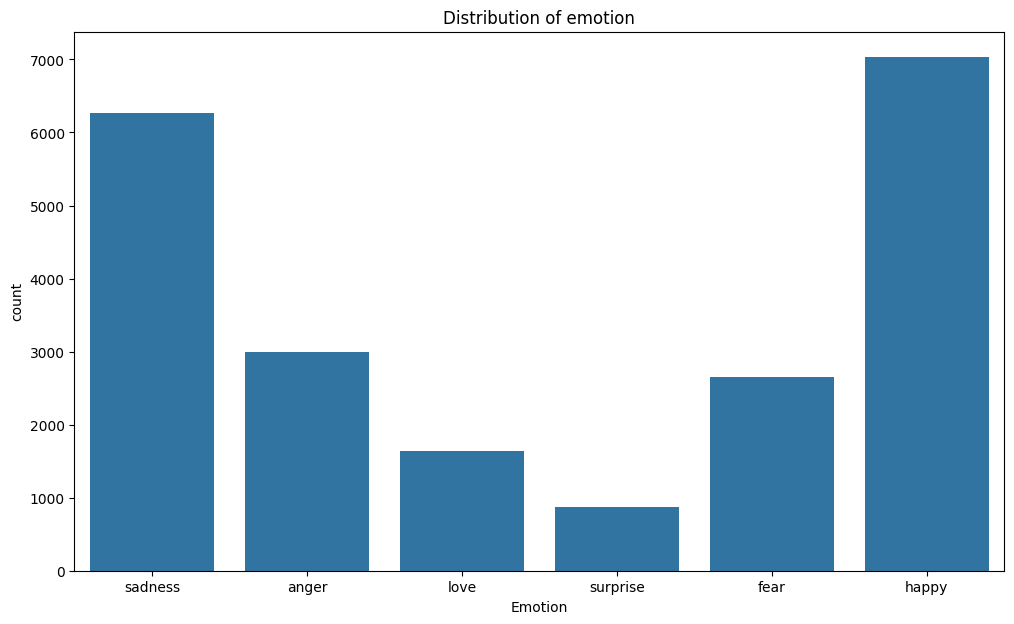

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='Emotion')
plt.title('Distribution of emotion')

In [ ]:
import plotly.express as px

fig = px.pie(df, names='Emotion', title='Proportion of Each emotion Category')
fig.show()

In [ ]:
status_analysis = df.groupby('Emotion').agg({
    'statement_length': ['mean', 'median', 'std'],
    'num_words': ['mean', 'median', 'std']
})

Text(0.5, 1.0, 'Average of characters per statement')

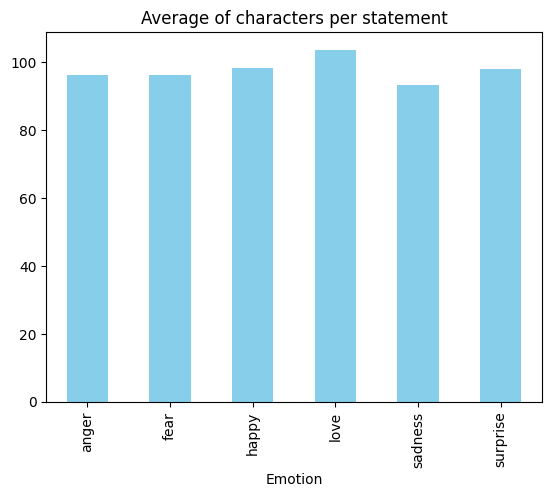

In [ ]:
status_analysis['statement_length']['mean'].plot(kind='bar',color='skyblue')
plt.title('Average of characters per statement')

Text(0.5, 1.0, 'Average of words per statment')

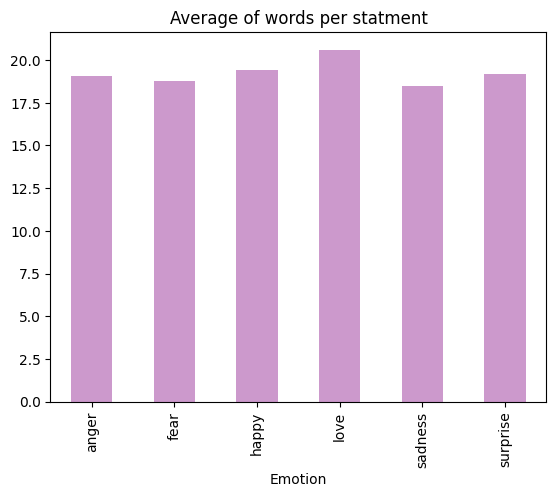

In [ ]:
status_analysis['num_words']['mean'].plot(kind='bar',color='purple',alpha=0.4)
plt.title('Average of words per statment')

In [ ]:
!pip install nltk

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))

    tokens = [word for word in tokens if word not in stop_words]

    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    return ' '.join(stemmed_tokens)


df['processed_statement'] = df['Text'].apply(preprocess_text)

df[['Text', 'processed_statement']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Text,processed_statement
0,i didnt feel humiliated,didnt feel humili
1,i can go from feeling so hopeless to so damned...,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,feel grouchi


In [ ]:
df.head(10)

,Text,Emotion,statement_length,num_words,avg_word_length,vocabulary_size,processed_statement
0,i didnt feel humiliated,sadness,23,4,6,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,21,5,19,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,10,5,10,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,18,5,16,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,4,5,4,feel grouchi
5,ive been feeling a little burdened lately wasn...,sadness,65,12,5,12,ive feel littl burden late wasnt sure
6,ive been taking or milligrams or times recomme...,surprise,122,23,5,21,ive take milligram time recommend amount ive f...
7,i feel as confused about life as a teenager or...,fear,73,17,4,13,feel confus life teenag jade year old man
8,i have been with petronas for years i feel tha...,happy,98,19,5,17,petrona year feel petrona perform well made hu...
9,i feel romantic too,love,19,4,5,4,feel romant


In [ ]:
!pip install wordcloud

In [ ]:
statuses = df['Emotion'].unique()

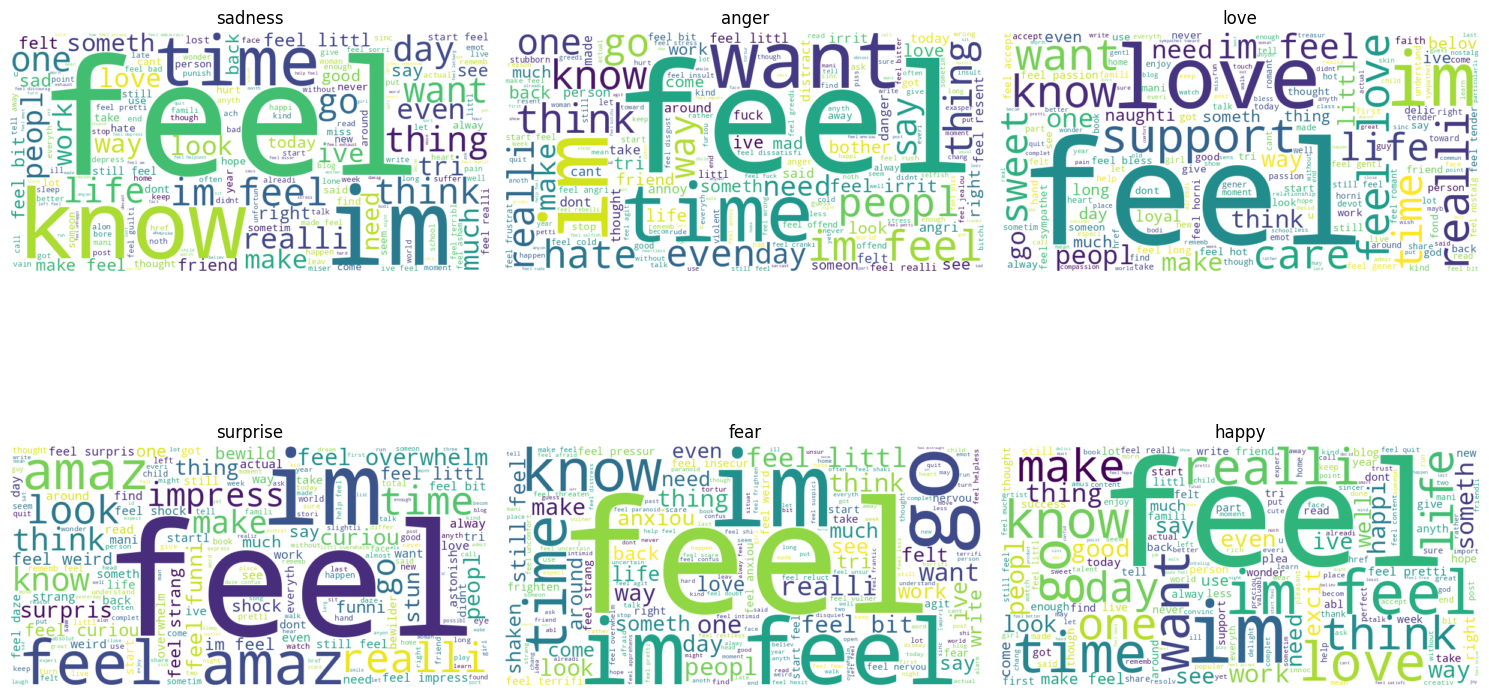

In [ ]:
from wordcloud import WordCloud
import math

num_statuses = len(statuses)
cols = 3
rows = math.ceil(num_statuses / cols)

plt.figure(figsize=(15, 5 * rows))

for i, status in enumerate(statuses, 1):
    text = " ".join(df[df['Emotion'] == status]['processed_statement'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(rows, cols, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(status)

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

status_words = {}

for status in statuses:
    text = " ".join(df[df['Emotion'] == status]['processed_statement'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    word_frequencies = wordcloud.words_

    sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:30]

    status_words[status] = sorted_words


for status, words in status_words.items():
    print(f"\nEmotion: {status}")
    print("-" * 50)
    for word, importance in words:
        print(f"Word: {word}, Importance: {round(importance, 3)}")


Emotion: sadness
--------------------------------------------------
Word: feel, Importance: 1.0
Word: im, Importance: 0.347
Word: know, Importance: 0.266
Word: time, Importance: 0.227
Word: im feel, Importance: 0.225
Word: want, Importance: 0.2
Word: think, Importance: 0.198
Word: thing, Importance: 0.194
Word: day, Importance: 0.192
Word: go, Importance: 0.191
Word: life, Importance: 0.184
Word: one, Importance: 0.182
Word: realli, Importance: 0.177
Word: peopl, Importance: 0.176
Word: even, Importance: 0.171
Word: make, Importance: 0.142
Word: look, Importance: 0.142
Word: way, Importance: 0.138
Word: ive, Importance: 0.137
Word: tri, Importance: 0.137
Word: love, Importance: 0.136
Word: much, Importance: 0.135
Word: work, Importance: 0.135
Word: someth, Importance: 0.13
Word: need, Importance: 0.129
Word: feel littl, Importance: 0.126
Word: say, Importance: 0.124
Word: sad, Importance: 0.123
Word: right, Importance: 0.114
Word: see, Importance: 0.112

Emotion: anger
---------------